<div style="text-align: center;font-size: 2em;"">
<h1 style="color:orange;">Welcome to BAA Webinar!</h1>
<h2 style="color:green;">Topic: "Curious Astronomical Cycles"</h2>
<h3 style="color:gray;">Ashokkumar Sundaramurthy (Bahrain)</h3>
<h3 style="color:gray;">22nd February 2025</h3>
</div>

![Jupyter Logo](Mark-Webber-Quote-Life-is-a-cycle-of-ends-and-starts.jpg)


<div style="text-align: center; font-size: 1.5em;">
    <h2><span style="color: green;">Level 1:</span> <span style="color: black;">Ideal signals</span></h2>
</div>

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fft, fftfreq
from astropy.timeseries import LombScargle

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

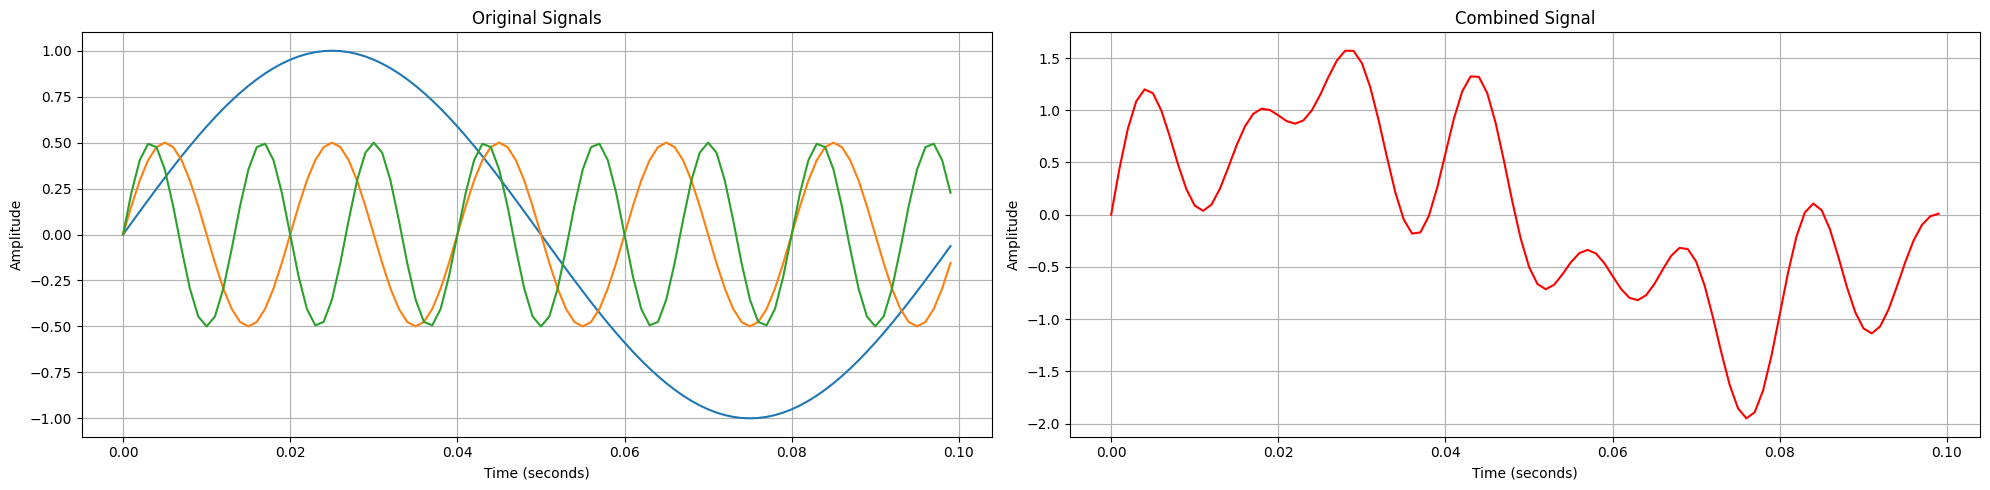

In [173]:
# Define signal parameters
N = 1024       
T = 1.0 / 1000  # sampling rate = 1000 Hz
t = np.linspace(0.0, N*T, N, endpoint=False)  

# Create a signal: sum of two sine waves (10 Hz and 50 Hz)
f1, f2 = 10, 50  # Frequencies in Hz
signal_1_u = np.sin(2.0 * np.pi * f1 * t)
signal_2_u = 0.5 * np.sin(2.0 * np.pi * f2 * t)
signal_3_u = 0.5 * np.sin(2.0 * np.pi * 75 * t)
signal_sum = signal_1_u + signal_2_u + signal_3_u

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(t[:100], signal_1_u[:100])
plt.plot(t[:100], signal_2_u[:100])
plt.plot(t[:100], signal_3_u[:100])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Original Signals')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t[:100], signal_sum[:100], color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Combined Signal')
plt.grid()

plt.tight_layout()
plt.show()

<div style="text-align: center; font-size: 1.2em; max-width: 80%; margin: auto;">
    <h3><span style="color: gray;">Fourier Transform - A Saviour from the Frequency Domain!</span></h3>
        <img src="joseph_fourier.jpg" alt="Joseph Fourier" width="200">
    <p><b>Joseph Fourier</b> was a French mathematician and physicist best known for his work on the development of the <b>Fourier series</b>, which later led to the <b>Fourier Transform</b>.</p>
    <p>His research laid the foundation for many areas of <b>signal processing, physics, and engineering</b>.</p>
    <p>The <b>Fourier Transform</b> is a mathematical operation that converts a function from the <b>time domain</b> to the <b>frequency domain</b>. It helps analyze signals by breaking them down into sinusoidal components of different frequencies.</p>
</div>


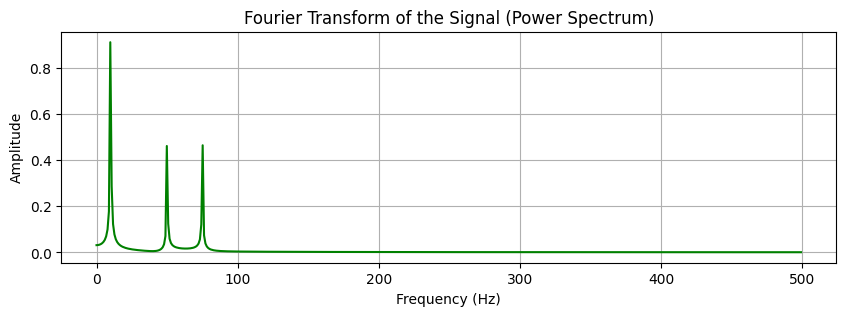

In [174]:
# Compute Fourier Transform using numpy
fft_signal = np.fft.fft(signal_sum)
freqs = np.fft.fftfreq(N, d=T)

# Plot the power spectrum
plt.figure(figsize=(10, 3))
plt.plot(freqs[:N//2], 2.0/N * np.abs(fft_signal[:N//2]), color='green')  # Plot only positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of the Signal (Power Spectrum)')
plt.grid()
plt.show()

<div style="text-align: center; font-size: 1.5em;">
    <h2><span style="color: green;">Level 2:</span> <span style="color: black;">'Real World' signal comes with a component of noise</span></h2>
</div>

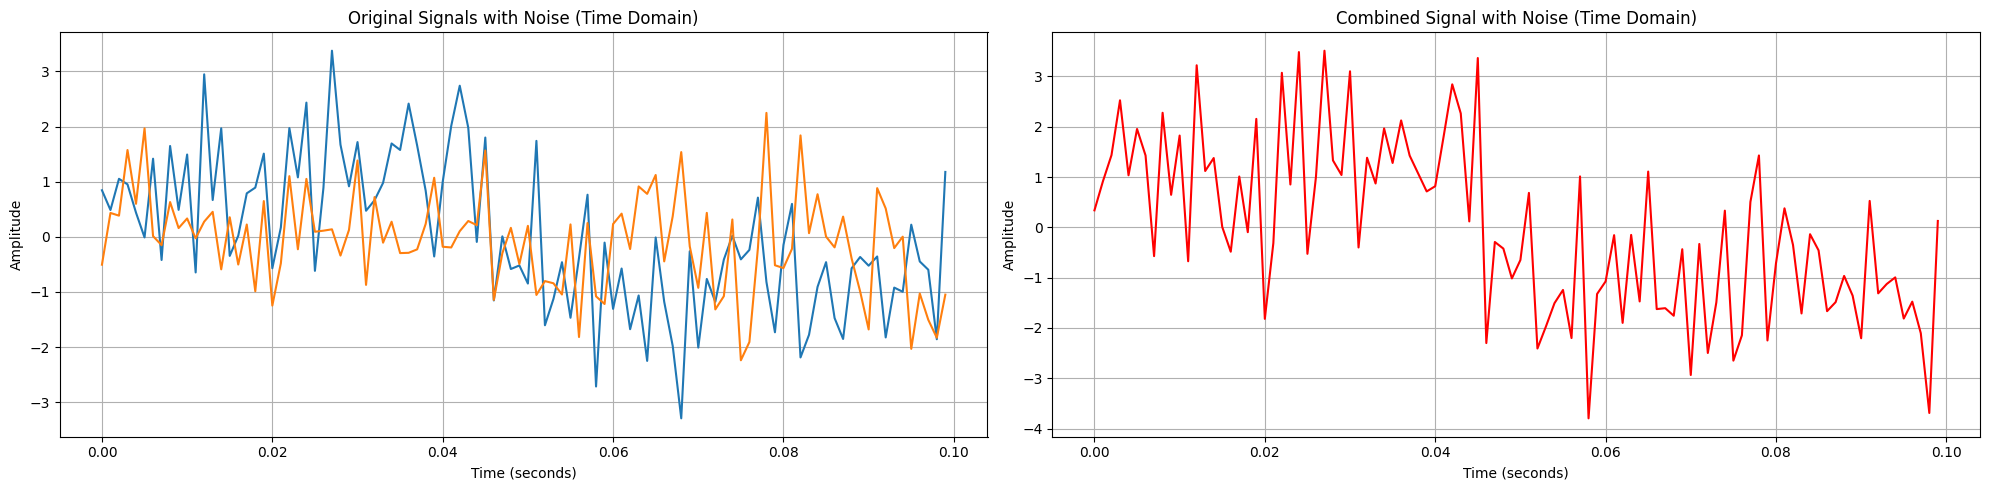

In [178]:
f1, f2 = 10, 50  # Frequencies in Hz
signal_1_u = np.sin(2.0 * np.pi * f1 * t)
signal_2_u = 0.5 * np.sin(2.0 * np.pi * f2 * t)
signal_sum = signal_1_u + signal_2_u

# Add random noise to the signals
noise_1 = np.random.normal(0, 0.9, N)  
noise_2 = np.random.normal(0, 0.9, N)  
signal_1_u += noise_1
signal_2_u += noise_2

# Combine the signals
signal_sum = signal_1_u + signal_2_u

# Plot the original signal
plt.figure(figsize=(20, 5))

# First subplot (signal_1_u and signal_2_u with noise)
plt.subplot(1, 2, 1)
plt.plot(t[:100], signal_1_u[:100])
plt.plot(t[:100], signal_2_u[:100])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Original Signals with Noise (Time Domain)')
plt.grid()

# Second subplot (signal_sum with noise)
plt.subplot(1, 2, 2)
plt.plot(t[:100], signal_sum[:100], color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Combined Signal with Noise (Time Domain)')
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()


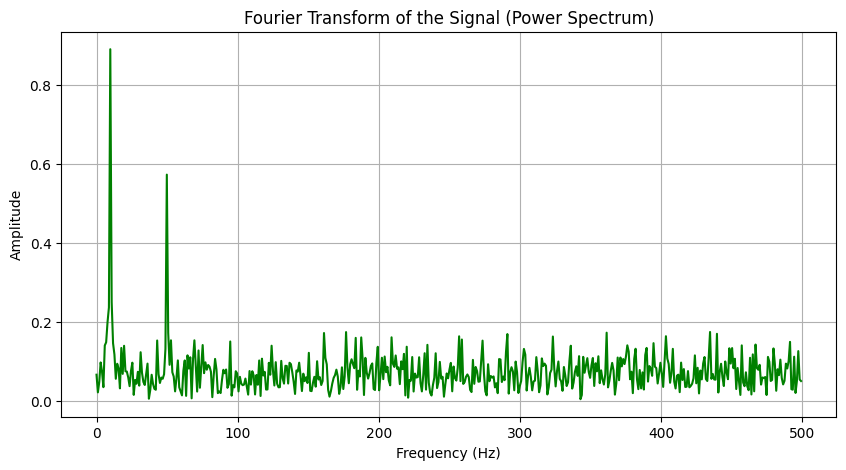

In [179]:
# Compute Fourier Transform using numpy
fft_signal = np.fft.fft(signal_sum)
freqs = np.fft.fftfreq(N, d=T)

# Plot the power spectrum
plt.figure(figsize=(10, 5))
plt.plot(freqs[:N//2], 2.0/N * np.abs(fft_signal[:N//2]), color='green')  # Plot only positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of the Signal (Power Spectrum)')
plt.grid()
plt.show()


<div style="text-align: center; font-size: 1.5em;">
    <h2><span style="color: green;">Level 3:</span> <span style="color: black;">Nothing is continuous - Introducing 'Window functions'</span></h2>
</div>

<div>
<p><b>Dirac Comb:</b> It is named after the physicist Paul Dirac, as it is constructed using the Dirac delta function δ(t), which he introduced.The function consists of an infinite series of equally spaced Dirac delta spikes, resembling the teeth of a comb.</p>

</div>

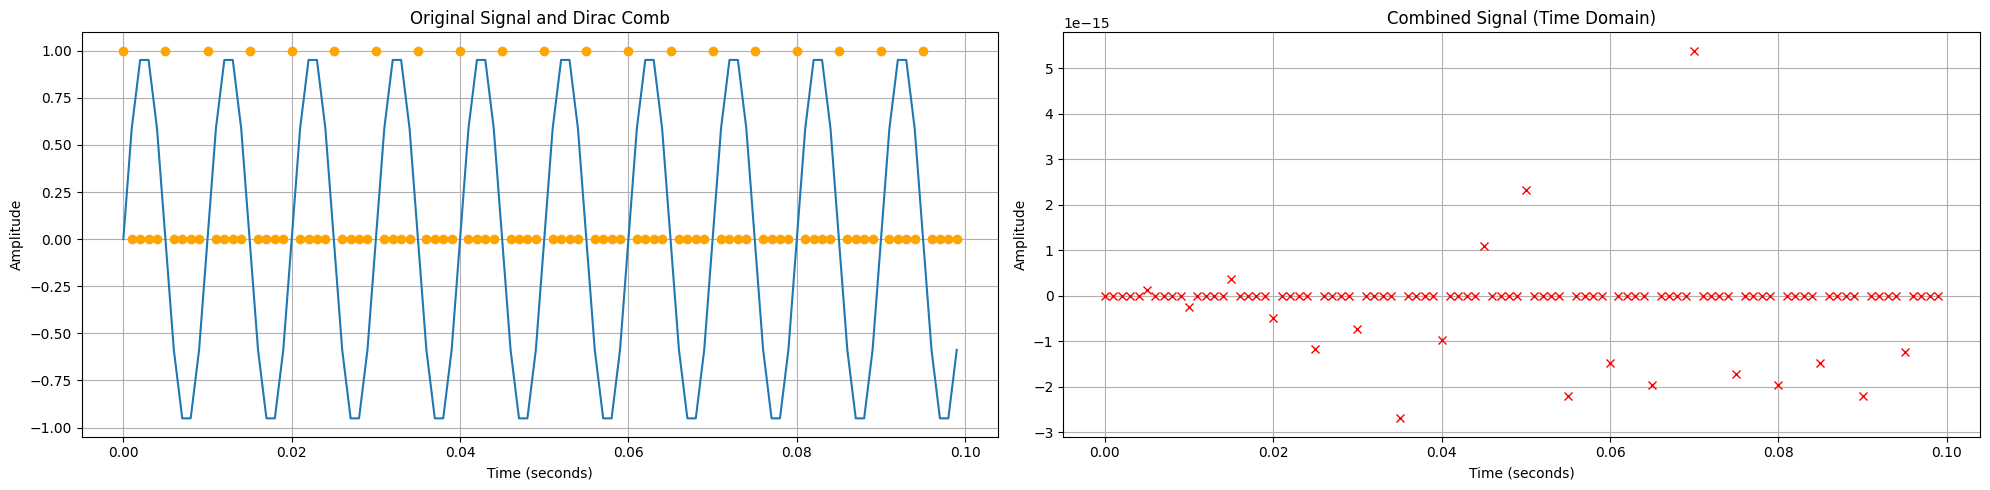

In [184]:
f1 = 100
signal_1_u = np.sin(2.0 * np.pi * f1 * t)

# Create a Dirac comb signal (periodic impulse train)
period = 5  # Period of impulses (spacing between impulses in samples)
dirac_comb = np.zeros(N)
dirac_comb[::period] = 1  

signal_sum = signal_1_u * dirac_comb

plt.figure(figsize=(20, 5))

# First subplot (signal_1_u and dirac_comb)
plt.subplot(1, 2, 1)
plt.plot(t[:100], signal_1_u[:100])
plt.plot(t[:100], dirac_comb[:100], marker='o', linestyle='None', color='orange')  
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Original Signal and Dirac Comb')
plt.grid()

# Second subplot (signal_sum only)
plt.subplot(1, 2, 2)
plt.plot(t[:100], signal_sum[:100], marker='x', linestyle='None', color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Combined Signal (Time Domain)')
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

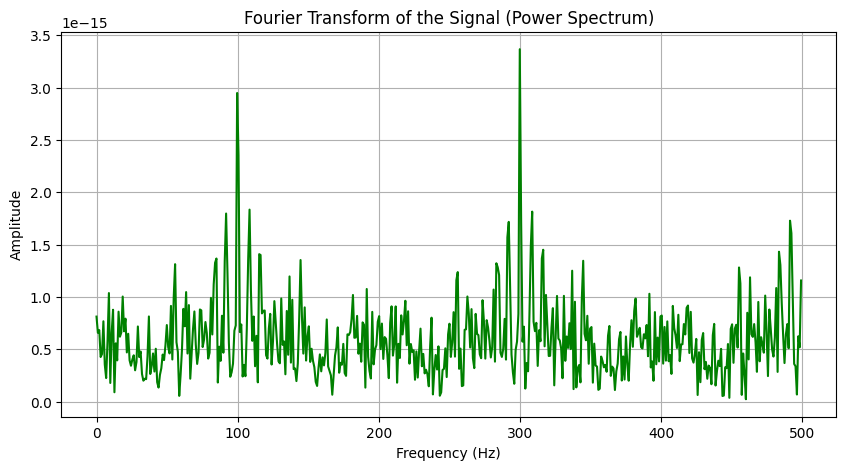

In [185]:
# Compute Fourier Transform using numpy
fft_signal = np.fft.fft(signal_sum)
freqs = np.fft.fftfreq(N, d=T)

# Plot the power spectrum
plt.figure(figsize=(10, 5))
plt.plot(freqs[:N//2], 2.0/N * np.abs(fft_signal[:N//2]), color='green')  # Plot only positive frequencies
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of the Signal (Power Spectrum)')
plt.grid()
plt.show()

<div style="text-align: center; font-size: 1.5em;">
    <h2><span style="color: green;">Level 4:</span> <span style="color: black;">Astronomy measurements are almost always non-uniform!</span></h2>
</div>

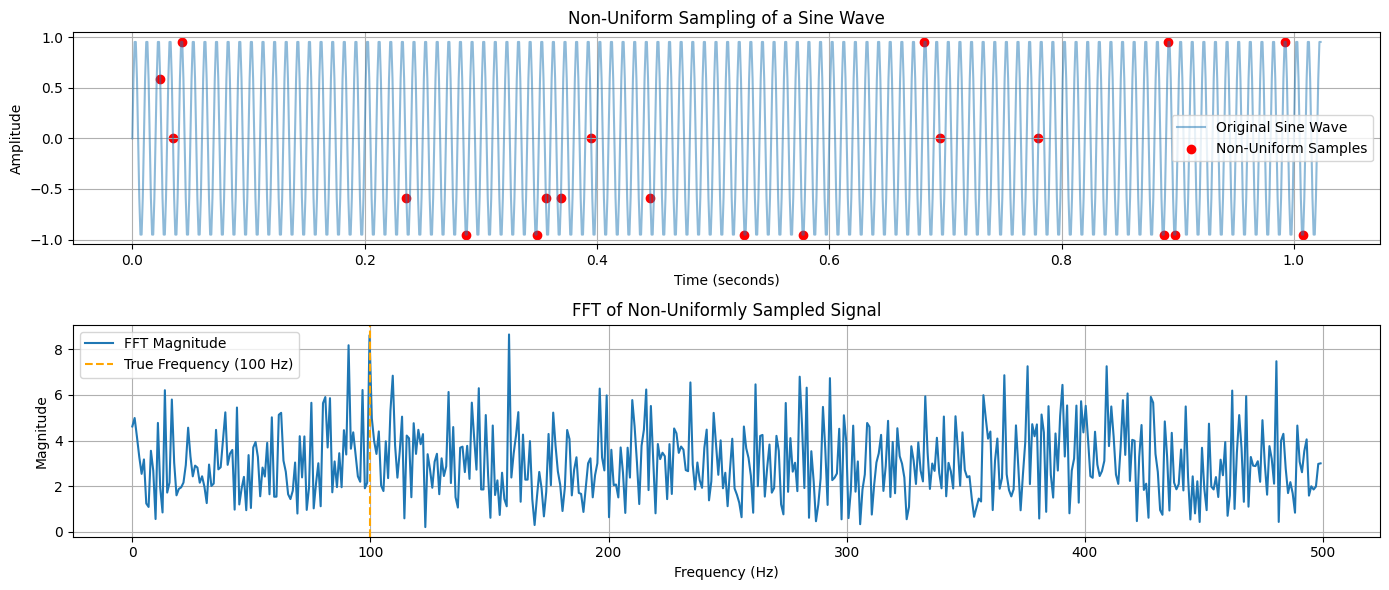

In [8]:
# Define signal parameters
N = 1024      
T = 1.0 / 1000
t = np.linspace(0.0, N*T, N, endpoint=False) 

# Generate a pure sine wave
f1 = 100  # True frequency of the signal
signal = np.sin(2.0 * np.pi * f1 * t)

# Create a non-uniform sampling pattern (intentionally irregular)
num_samples = 20  # Sparse and non-uniform sampling
sampled_indices = np.sort(np.random.choice(N, num_samples, replace=False))  # Random unique indices
t_sampled = t[sampled_indices]  # Select non-uniform time points
signal_sampled = signal[sampled_indices]  # Sample the sine wave at those points

# Compute FFT on the non-uniformly sampled signal (Zero-filled for missing samples)
fft_input = np.zeros(N)
fft_input[sampled_indices] = signal_sampled  # Only use sampled values, zero elsewhere
fft_output = fft(fft_input)
frequencies = fftfreq(N, T)

# Plot original signal and sampled signal
plt.figure(figsize=(14, 6))

# Plot time domain signals
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original Sine Wave', alpha=0.5)
plt.scatter(t_sampled, signal_sampled, color='red', label='Non-Uniform Samples')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Non-Uniform Sampling of a Sine Wave')
plt.legend()
plt.grid()

# Plot FFT result
plt.subplot(2, 1, 2)
plt.plot(frequencies[:N // 2], np.abs(fft_output[:N // 2]), label="FFT Magnitude")
plt.axvline(x=f1, color='orange', linestyle='--', label='True Frequency (100 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Non-Uniformly Sampled Signal')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

<div style="text-align: center; font-size: 1.5em;">
    <h2><span style="color: green;">Level 5:</span> <span style="color: black;">Lomb-Scargle Periodogram rescues non-uniform signals</span></h2>
</div>

<div style="text-align: center; font-size: 1.2em; max-width: 80%; margin: auto;">
    <p><b>Nello Lomb (1976)</b> An Italian physicist who introduced the method for analyzing <b>unevenly sampled time series</b>.</p>
    <p><b>Jeffrey D. Scargle (1982)</b> An American astrophysicist who improved the method, making it widely used in <b>astronomy</b> for detecting periodic signals in light curves.</p>
    <p>The <b>Lomb-Scargle method</b> is a modified form of the <b>Fourier Transform</b> designed for <b>irregularly spaced data</b>, making it highly useful in fields like <b>exoplanet detection, variable star analysis, and pulsar studies</b>.</p>
</div>

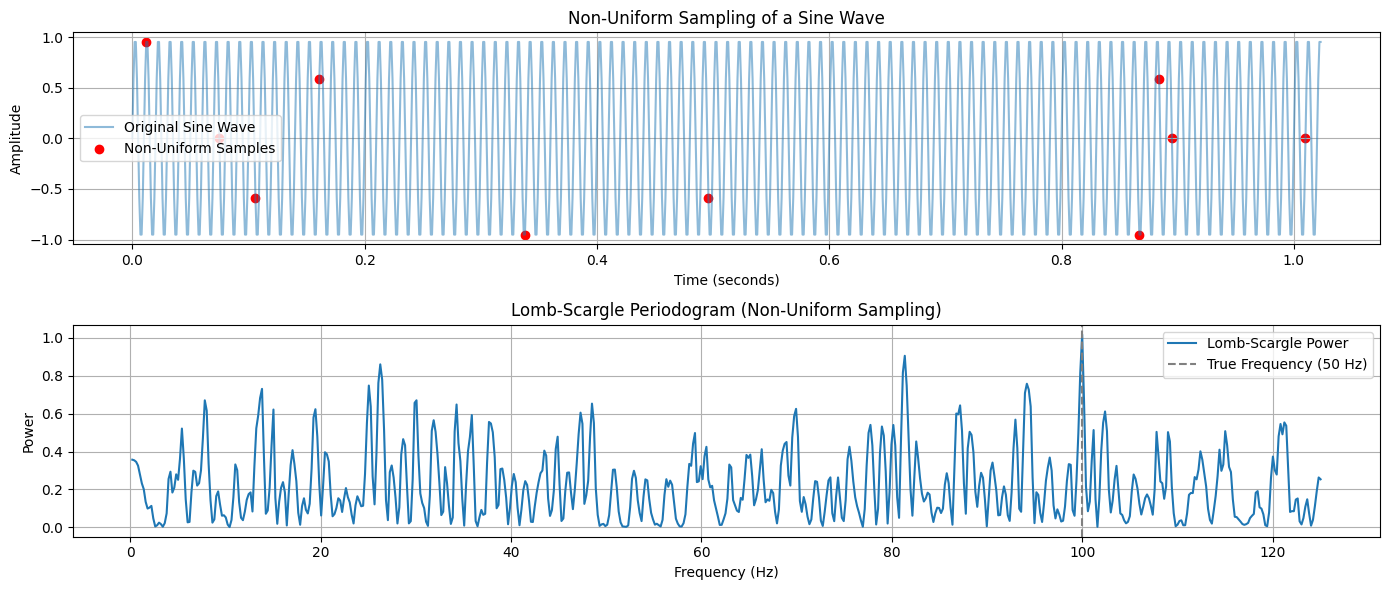

In [187]:
# Define signal parameters
N = 1024        # Total time samples (not actual sampled points)
T = 1.0 / 1000  # Sample spacing (Sampling rate = 1000 Hz)
t = np.linspace(0.0, N*T, N, endpoint=False)  # Uniform time array

# Generate a pure sine wave
f1 = 100  # True frequency of the signal
signal = np.sin(2.0 * np.pi * f1 * t)

# Create a non-uniform sampling pattern
num_samples = 10  # Sparse sampling
sampled_indices = np.sort(np.random.choice(N, num_samples, replace=False))  # Random unique indices
t_sampled = t[sampled_indices]  # Select non-uniform time points
signal_sampled = signal[sampled_indices]  # Sample the sine wave at those points

ls = LombScargle(t_sampled, signal_sampled)
frequencies, power = ls.autopower(minimum_frequency=0,
                           maximum_frequency=125)

# Plot original signal and sampled signal
plt.figure(figsize=(14, 6))

# Time Domain Plot
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original Sine Wave', alpha=0.5)
plt.scatter(t_sampled, signal_sampled, color='red', label='Non-Uniform Samples')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Non-Uniform Sampling of a Sine Wave')
plt.legend()
plt.grid()

# Frequency Domain Plot (Lomb-Scargle)
plt.subplot(2, 1, 2)
plt.plot(frequencies, power, label="Lomb-Scargle Power")
plt.axvline(x=f1, color='gray', linestyle='--', label='True Frequency (50 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Lomb-Scargle Periodogram (Non-Uniform Sampling)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


<div style="text-align: center; font-size: 1.5em;">
    <h2><span style="color: green;">Level 6:</span> <span style="color: black;">TESS target TOI-1181-b (deriving period from lightcurve)</span></h2>
</div>

<div style="text-align: center; font-size: 1.2em; max-width: 80%; margin: auto;">
    <p>TOI-1181 b is a gas giant exoplanet discovered in 2022. It orbits an F-type star approximately 1,013 light-years away.</p>
    <p>The discovery of TOI-1181 b was made using the transit method and this method is particularly effective for identifying exoplanets with short orbital periods, such as TOI-1181 b.</p>
</div>


Best period: 2.0797598212323014 days


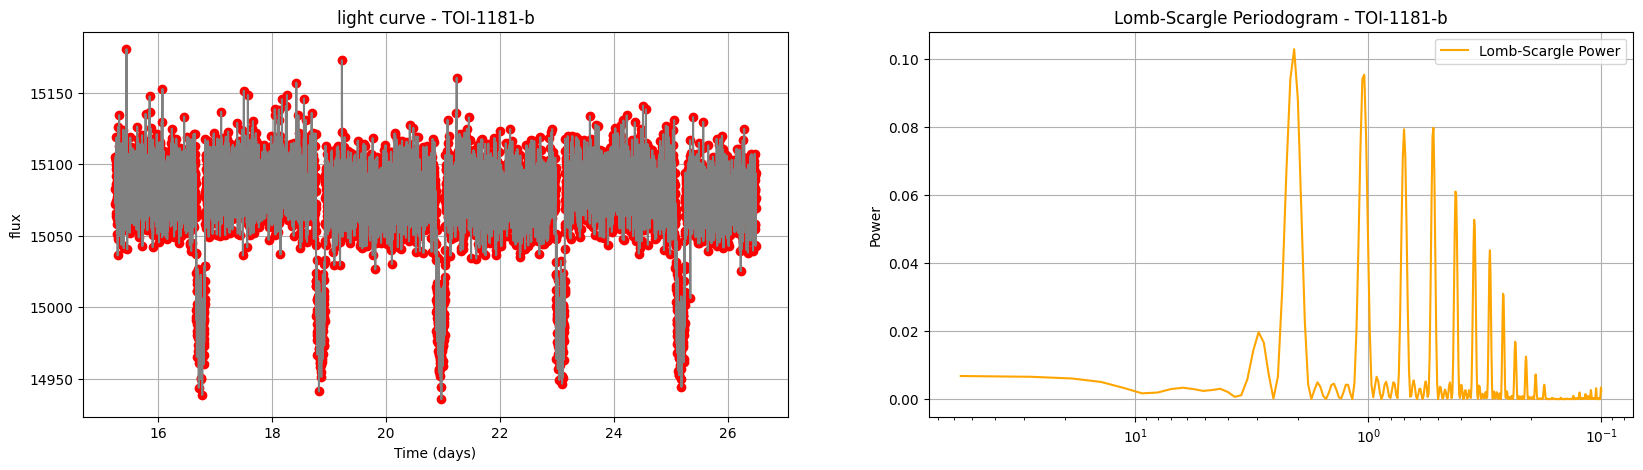

In [190]:
target = "TOI-1181-b"
lc = pd.read_csv('TOI-1181-b.csv')
lc = lc.dropna(subset=['flux'])
last_n = -8000
time = (lc['time'] - lc['time'][0])[last_n:]
flux = lc['flux'][last_n:]
ls = LombScargle(time, flux)
frequency, power = ls.autopower(minimum_frequency=0, maximum_frequency=10)
period = 1. / frequency

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(time, flux, color='red', marker='o', linestyle='None')
plt.plot(time, flux, color='gray')
plt.xlabel('Time (days)')
plt.ylabel('flux')
plt.title('light curve - '+target)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(period, power, color='orange', label="Lomb-Scargle Power")
plt.xscale("log")  
# plt.xlim(right=1)
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram - "+target)
plt.legend()
plt.gca().invert_xaxis()  # Invert x-axis so shorter periods appear on the left
plt.grid()

best_period = period[np.nanargmax(power)]
print(f"Best period: {best_period} days")

### Phase-Folding the above Light Curve

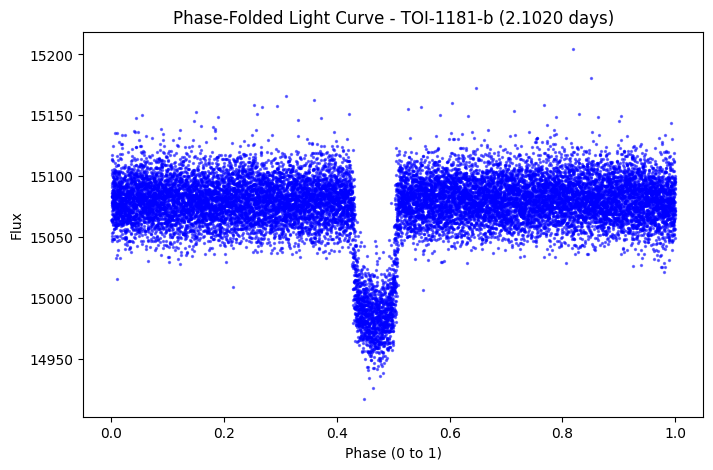

In [166]:
phase = ((time % best_period) / best_period + 0.5) % 1    # Normalize phase (0 to 1)
sorted_indices = np.argsort(phase)
phase_sorted = phase[sorted_indices]
flux_sorted = flux[sorted_indices]

plt.figure(figsize=(8, 5))
plt.scatter(phase_sorted, flux_sorted, s=2, color='blue', alpha=0.5)
plt.xlabel("Phase (0 to 1)")
plt.ylabel("Flux")
plt.title(f"Phase-Folded Light Curve - {target} ({best_period:.4f} days)")
plt.show()

<div style="text-align: center; font-size: 1.5em;">
    <h2><span style="color: green;">Level 7:</span> <span style="color: black;">Now, this TESS target, TOI-2202-b has perturbers</span></h2>
</div>

<div style="text-align: center; font-size: 1.2em; max-width: 80%; margin: auto;">
    <p>TOI-2202 b is a gas giant exoplanet orbiting the K-type star TOI-2202, located approximately 770 light-years away in the constellation Hydra. </p>
    <p>Discovered in 2021 through the transit method by the Transiting Exoplanet Survey Satellite (TESS)</p>
    <p>The system also includes a second gas giant, TOI-2202 c, with a mass of approximately 0.37 Jupiter masses and an orbital period of 24.7 days. <b>This places the two planets near a 2:1 mean motion resonance</b>, a configuration that provides valuable insights into planetary formation and dynamical evolution. </p>
</div>


<i><b>Due to the presence of perturbers (or orbital decay), the centre of transit starts shifting across observations, we see the base of spike broadened</i></b>

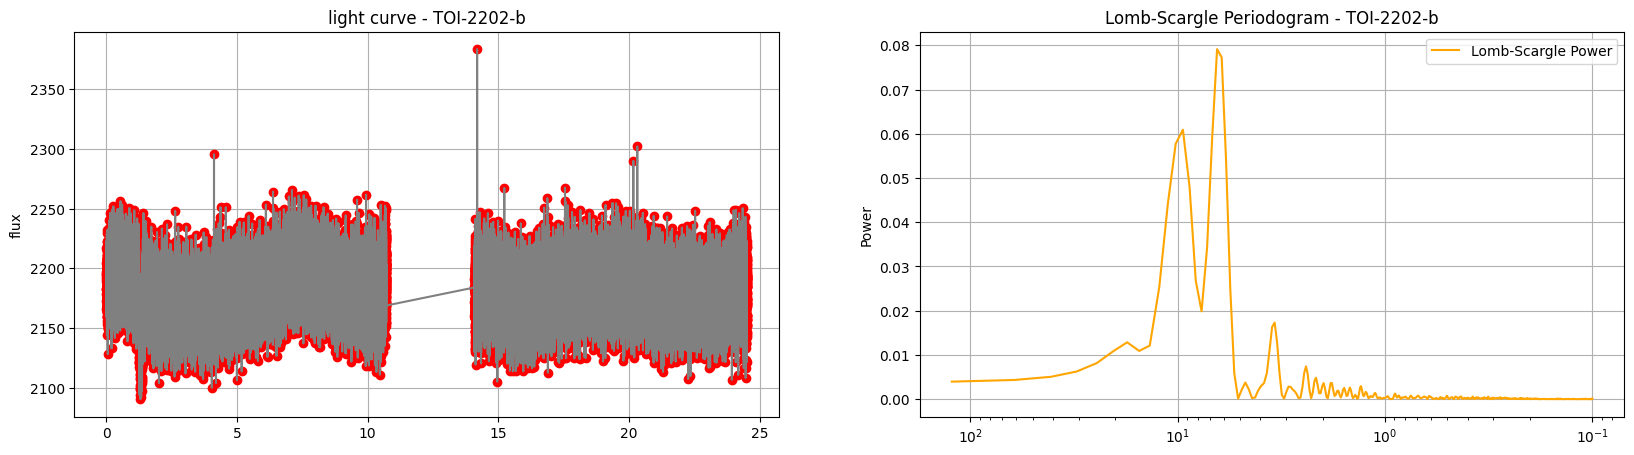

In [191]:
target = "TOI-2202-b"
lc = pd.read_csv('TOI-2202-b.csv')
lc = lc.dropna(subset=['flux'])

time = (lc['time'] - lc['time'][0])
flux = lc['flux']
ls = LombScargle(time, flux)
frequency, power = ls.autopower(minimum_frequency=0, maximum_frequency=10)
period = 1. / frequency

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(time, flux, color='red', marker='o', linestyle='None')
plt.plot(time, flux, color='gray')
plt.ylabel('flux')
plt.title('light curve - '+target)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(period, power, color='orange', label="Lomb-Scargle Power")
plt.xscale("log")  
# plt.xlim(right=1)
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram - "+target)
plt.legend()
plt.gca().invert_xaxis()  # Invert x-axis so shorter periods appear on the left
plt.grid()

<b>References:</b>

2021 - Triffonov et al., A Pair of Warm Giant Planets near the 2-1 Mean Motion Resonance around the K-dwarf Star TOI-2202

2024 - Fermiano et al., - The young exoplanetary system TOI-4562- Confirming the presence of a third body in the system

2024 - Korth et al., - TOI-1408- Discovery and Photodynamical Modeling of a Small Inner Companion to a Hot Jupiter Revealed by Transit Timing Variations

2017 - Jacob T. VanderPlas - Understanding the Lomb-Scargle Periodogram